In [123]:
import numpy as np
import matplotlib.pyplot as plt

In [124]:
def gernerate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
    inputs = []
    labels = []
    for i in range(11):
        inputs.append([0.1 * i, 0.1 * i])
        labels.append(0)
        if 0.1 * i == 0.5:
            continue
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21, 1)


In [125]:
class Model:
    def __init__(self):
        self.input_size = 2
        self.hidden1_size = 5
        self.hidden2_size = 5
        self.output_size = 1
        
        self.weights1 = np.random.rand(self.input_size, self.hidden1_size)
        self.weights2 = np.random.rand(self.hidden1_size, self.hidden2_size)
        self.weights3 = np.random.rand(self.hidden2_size, self.output_size)
        
        self.bias1 = 0.001
        self.bias2 = 0.001
        self.bias3 = 0.001
        
        # momentum optimizer
        self.beta = 0.9
        self.m_w1 = 0 # momemtum vector for weight
        self.m_b1 = 0 # momemtum vector for bias
        self.m_w2 = 0 
        self.m_b2 = 0
        self.m_w3 = 0 
        self.m_b3 = 0
        
        self.hidden1_output = ()
        self.hidden2_output = ()
        self.y = ()
        
        self.learning_rate = 0.0001
        
        # more hidden units
        
        
        
        # 照理來說要用for loop把x一個個送進來，但可以直接用矩陣乘法加速

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def sigmoid_derivatives(self, x):
        return x * (1-x)

    def ReLU(self, x):
        return np.maximum(0, x)
    
    def ReLU_derivatives(self, x):
        return 1 * (x > 0)

    def forward1(self, x):
        self.hidden1_output = self.sigmoid(np.dot(x, self.weights1) + self.bias1)
        # print(self.hidden1_output.shape)
        self.hidden2_output = self.sigmoid(np.dot(self.hidden1_output, self.weights2) + self.bias2)
        # print(self.hidden2_output.shape)
        self.y = self.sigmoid(np.dot(self.hidden2_output, self.weights3) + self.bias3)
        # print(self.y.shape)
        return self.y
    
    def back_propagation1(self, x, y_gt):
        ##### back propagation
        y_error = (self.y - y_gt)
        
        tmp = y_error * self.sigmoid_derivatives(self.y)
        self.weights3 -= self.learning_rate * np.dot(self.hidden2_output.T, tmp) 
        self.bias3 -= self.learning_rate * 1 * tmp
        
        hidden2_error = np.dot(tmp, self.weights3.T)
        tmp = hidden2_error * self.sigmoid_derivatives(self.hidden2_output)
        self.weights2 -= self.learning_rate * np.dot(self.hidden1_output.T, hidden2_error)
        self.bias2 -= self.learning_rate * 1 * tmp
        
        hidden1_error = np.dot(hidden2_error, self.weights2.T)
        tmp = hidden1_error * self.sigmoid_derivatives(self.hidden1_output)
        self.weights1 -= self.learning_rate * np.dot(x.T, tmp)
        self.bias1 -= self.learning_rate * 1 * tmp
        
        return (1/2) * np.sum((self.y - y_gt)**2) 
    
    def forward_wo_activation(self, x):
        self.hidden1_output = np.dot(x, self.weights1) + self.bias1
        # print(self.hidden1_output.shape)
        self.hidden2_output = np.dot(self.hidden1_output, self.weights2) + self.bias2
        # print(self.hidden2_output.shape)
        self.y = np.dot(self.hidden2_output, self.weights3) + self.bias3
        # print(self.y.shape)
        return self.y
    
    def back_propagation_wo_activation(self, x, y_gt):
        ##### back propagation
        y_error = (self.y - y_gt)
        
        tmp = y_error
        self.weights3 -= self.learning_rate * np.dot(self.hidden2_output.T, tmp) 
        self.bias3 -= self.learning_rate * 1 * tmp
        
        hidden2_error = np.dot(tmp, self.weights3.T)
        tmp = hidden2_error
        self.weights2 -= self.learning_rate * np.dot(self.hidden1_output.T, hidden2_error)
        self.bias2 -= self.learning_rate * 1 * tmp
        
        hidden1_error = np.dot(hidden2_error, self.weights2.T)
        tmp = hidden1_error
        self.weights1 -= self.learning_rate * np.dot(x.T, tmp)
        self.bias1 -= self.learning_rate * 1 * tmp
        
        return (1/2) * np.sum((self.y - y_gt)**2) 
    
    
    
    
    def forward2(self, x):
        self.hidden1_output = self.ReLU(np.dot(x, self.weights1) + self.bias1)
        # print(self.hidden1_output.shape)
        self.hidden2_output = self.sigmoid(np.dot(self.hidden1_output, self.weights2) + self.bias2)
        # print(self.hidden2_output.shape)
        self.y = self.sigmoid(np.dot(self.hidden2_output, self.weights3) + self.bias3)
        # print(self.y.shape)
        return self.y
    
    def back_propagation2(self, x, y_gt):
        ##### back propagation
        y_error = (self.y - y_gt)
        
        tmp = y_error * self.sigmoid_derivatives(self.y)
        self.weights3 -= self.learning_rate * np.dot(self.hidden2_output.T, tmp) 
        self.bias3 -= self.learning_rate * 1 * tmp
        
        hidden2_error = np.dot(tmp, self.weights3.T)
        tmp = hidden2_error * self.sigmoid_derivatives(self.hidden2_output)
        self.weights2 -= self.learning_rate * np.dot(self.hidden1_output.T, hidden2_error)
        self.bias2 -= self.learning_rate * 1 * tmp
        
        hidden1_error = np.dot(hidden2_error, self.weights2.T)
        tmp = hidden1_error * self.ReLU_derivatives(self.hidden1_output)
        self.weights1 -= self.learning_rate * np.dot(x.T, tmp)
        self.bias1 -= self.learning_rate * 1 * tmp
        
        return (1/2) * np.sum((self.y - y_gt)**2)    
    
    def back_propagation_momentum(self, x, y_gt):
        ##### back propagation
        y_error = (self.y - y_gt)
        tmp = y_error * self.sigmoid_derivatives(self.y)
        self.m_w3 = self.beta * self.m_w3 - self.learning_rate * np.dot(self.hidden2_output.T, tmp)
        self.m_b3 = self.beta * self.m_b3 - self.learning_rate * tmp
        self.weights3 += self.m_w3
        self.bias3 += self.m_b3
        
        hidden2_error = np.dot(tmp, self.weights3.T)
        tmp = hidden2_error * self.sigmoid_derivatives(self.hidden2_output)
        self.m_w2 = self.beta * self.m_w2 - self.learning_rate * np.dot(self.hidden1_output.T, tmp)
        self.m_b2 = self.beta * self.m_b2 - self.learning_rate * tmp
        self.weights2 += self.m_w2
        self.bias2 += self.m_b2
        
        hidden1_error = np.dot(hidden2_error, self.weights2.T)
        tmp = hidden1_error * self.ReLU_derivatives(self.hidden1_output)
        self.m_w1 = self.beta * self.m_w1 - self.learning_rate * np.dot(x.T, tmp)
        self.m_b1 = self.beta * self.m_b1 - self.learning_rate * tmp
        self.weights1 += self.m_w1
        self.bias1 += self.m_b1
        
        return (1/2) * np.sum((self.y - y_gt)**2)
    
    
    
    


## Linear data

########## Training ##########
epoch: 0 loss: 22.49240503978926
epoch: 5000 loss: 11.777981746494767
epoch: 10000 loss: 10.984241634746974
epoch: 15000 loss: 10.139139846654919
epoch: 20000 loss: 9.034778543830592
epoch: 25000 loss: 7.214186387945444
epoch: 30000 loss: 4.859765974784632
epoch: 35000 loss: 3.1529948549601463
epoch: 40000 loss: 2.193173410606275
epoch: 45000 loss: 1.6262636116884133
epoch: 50000 loss: 1.2426783854484054
epoch: 55000 loss: 0.9564164092474733
epoch: 60000 loss: 0.739234059706588
epoch: 65000 loss: 0.5776109873323451
epoch: 70000 loss: 0.4589971610864266
epoch: 75000 loss: 0.37187170853945967
epoch: 80000 loss: 0.30712995958265293
epoch: 85000 loss: 0.2582006888880952
epoch: 90000 loss: 0.2205260605050441
epoch: 95000 loss: 0.19097776993741006
epoch: 100000 loss: 0.1673983632548648
########## Testing ##########
[[0.05924774]
 [0.05832783]
 [0.05886947]
 [0.0605292 ]
 [0.94109606]
 [0.9995651 ]
 [0.99954755]
 [0.99528228]
 [0.06020912]
 [0.06117667]
 [0.9983

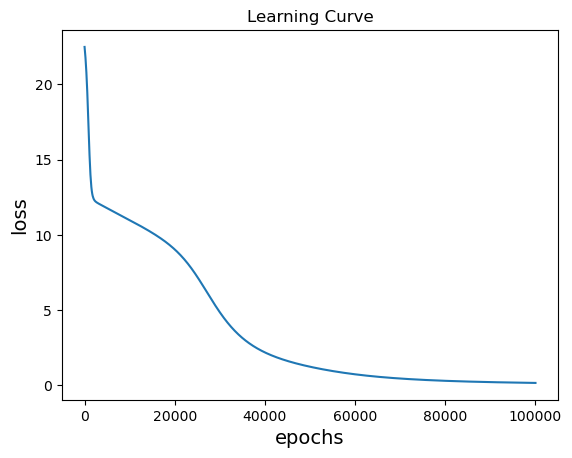

In [126]:
x, y = gernerate_linear(n=100)

epochs = 100001   
model = Model()
# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model.forward1(x)
    loss = model.back_propagation1(x, y)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list)
plt.ylabel('loss', fontsize = 14)
plt.xlabel('epochs', fontsize = 14)

# testing
print("########## Testing ##########")
y_pred_probability = model.forward1(x)
print(y_pred_probability)
y_pred = np.where(y_pred_probability > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y, y_pred) if i == j) / len(y))

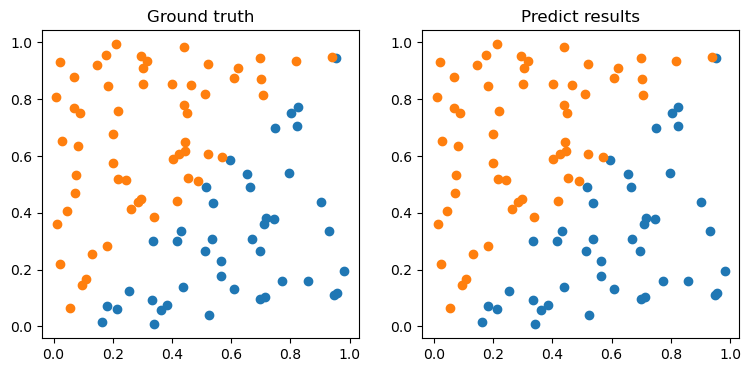

In [40]:
figure, axis = plt.subplots(1, 2, figsize=(9, 4))
# plt.figure("Ground truth")
# plt.title("Ground truth")
axis[0].set_title("Ground truth")
for i in [0, 1]:
    axis[0].scatter(x=x[np.where(y[:, 0] == i), 0], y=x[np.where(y[:, 0] == i), 1])
# plt.figure("Predict results")
# plt.title("Predict results")
axis[1].set_title("Predict results")
for i in [0, 1]:
    axis[1].scatter(x=x[np.where(y_pred[:, 0] == i), 0], y=x[np.where(y_pred[:, 0] == i), 1])
plt.show()

## XOR data

In [47]:
x_xor, y_xor = generate_XOR_easy()

########## Training ##########
epoch: 0 loss: 3.9208490963707274
epoch: 5000 loss: 2.5100385169567128
epoch: 10000 loss: 2.3300529261538605
epoch: 15000 loss: 2.188852819173854
epoch: 20000 loss: 2.0575306319928295
epoch: 25000 loss: 1.935499283876928
epoch: 30000 loss: 1.8222798218060903
epoch: 35000 loss: 1.7173541585359098
epoch: 40000 loss: 1.6201853301661855
epoch: 45000 loss: 1.5302338780558449
epoch: 50000 loss: 1.44697013207256
epoch: 55000 loss: 1.3698830190523619
epoch: 60000 loss: 1.2984860236378029
epoch: 65000 loss: 1.232320886027318
epoch: 70000 loss: 1.170959553350967
epoch: 75000 loss: 1.1140048231860742
epoch: 80000 loss: 1.0610900392677398
epoch: 85000 loss: 1.0118781268621975
epoch: 90000 loss: 0.9660601916670677
epoch: 95000 loss: 0.9233538525352437
epoch: 100000 loss: 0.8835014345686533
########## Testing ##########
[[0.28147538]
 [0.70148264]
 [0.28154302]
 [0.70146154]
 [0.28163376]
 [0.70143899]
 [0.28174449]
 [0.70141507]
 [0.28187158]
 [0.70138984]
 [0.2820111

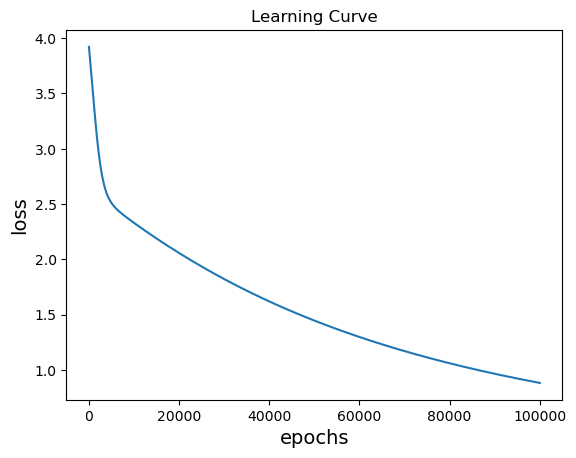

In [127]:
epochs = 100001   
model = Model()
# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model.forward1(x_xor)
    loss = model.back_propagation1(x_xor, y_xor)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list)
plt.ylabel('loss', fontsize = 14)
plt.xlabel('epochs', fontsize = 14)

# testing
print("########## Testing ##########")
y_pred_probability_xor = model.forward1(x_xor)
print(y_pred_probability_xor)
y_pred_xor = np.where(y_pred_probability_xor > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y_xor, y_pred_xor) if i == j) / len(y_xor))

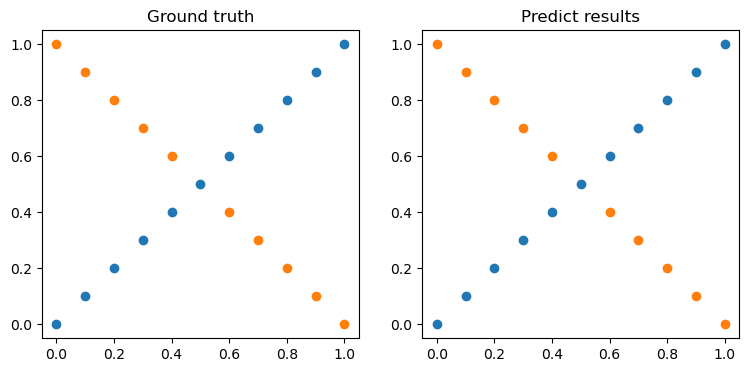

In [49]:
figure, axis = plt.subplots(1, 2, figsize=(9, 4))
# plt.figure("Ground truth")
# plt.title("Ground truth")
axis[0].set_title("Ground truth")
for i in [0, 1]:
    axis[0].scatter(x=x_xor[np.where(y_xor[:, 0] == i), 0], y=x_xor[np.where(y_xor[:, 0] == i), 1])
# plt.figure("Predict results")
# plt.title("Predict results")
axis[1].set_title("Predict results")
for i in [0, 1]:
    axis[1].scatter(x=x_xor[np.where(y_pred_xor[:, 0] == i), 0], y=x_xor[np.where(y_pred_xor[:, 0] == i), 1])
plt.show()

## Discussion
#### different learning rate

########## Training ##########
epoch: 0 loss: 15.817023461633237
epoch: 5000 loss: 0.007685831570756974
########## Testing ##########
[[0.01099045]
 [0.01531922]
 [0.99057828]
 [0.98116874]
 [0.98672825]
 [0.99176187]
 [0.01354405]
 [0.01326174]
 [0.98934195]
 [0.9911593 ]
 [0.01014525]
 [0.98330096]
 [0.9893798 ]
 [0.01451534]
 [0.99248393]
 [0.01435507]
 [0.01461161]
 [0.98426033]
 [0.01471838]
 [0.98475226]
 [0.00997139]
 [0.9923302 ]
 [0.00994441]
 [0.0116332 ]
 [0.98808592]
 [0.99275881]
 [0.01057843]
 [0.99270229]
 [0.0103704 ]
 [0.99167491]
 [0.01549502]
 [0.98445332]
 [0.98887365]
 [0.01022385]
 [0.01004054]
 [0.98888208]
 [0.99249269]
 [0.99058001]
 [0.98787192]
 [0.99131359]
 [0.9913145 ]
 [0.00977717]
 [0.98329332]
 [0.01053498]
 [0.99245841]
 [0.9906584 ]
 [0.00980082]
 [0.00990111]
 [0.00992201]
 [0.98965697]
 [0.9866227 ]
 [0.98485906]
 [0.01251319]
 [0.01021207]
 [0.01571988]
 [0.99133638]
 [0.99193238]
 [0.01089295]
 [0.98520567]
 [0.01029405]
 [0.98479621]
 [0.9876432 

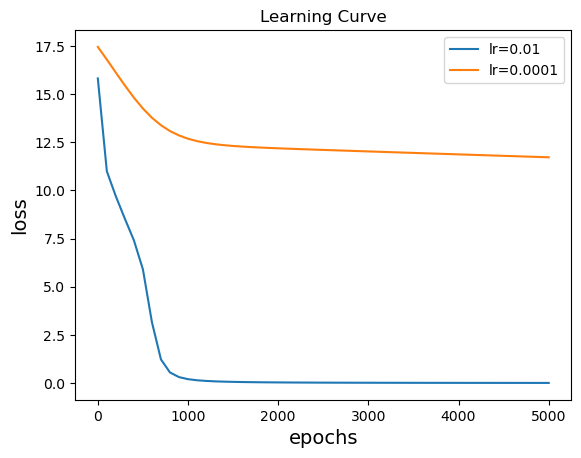

########## Testing ##########
[[0.01099045]
 [0.01531922]
 [0.99057828]
 [0.98116874]
 [0.98672825]
 [0.99176187]
 [0.01354405]
 [0.01326174]
 [0.98934195]
 [0.9911593 ]
 [0.01014525]
 [0.98330096]
 [0.9893798 ]
 [0.01451534]
 [0.99248393]
 [0.01435507]
 [0.01461161]
 [0.98426033]
 [0.01471838]
 [0.98475226]
 [0.00997139]
 [0.9923302 ]
 [0.00994441]
 [0.0116332 ]
 [0.98808592]
 [0.99275881]
 [0.01057843]
 [0.99270229]
 [0.0103704 ]
 [0.99167491]
 [0.01549502]
 [0.98445332]
 [0.98887365]
 [0.01022385]
 [0.01004054]
 [0.98888208]
 [0.99249269]
 [0.99058001]
 [0.98787192]
 [0.99131359]
 [0.9913145 ]
 [0.00977717]
 [0.98329332]
 [0.01053498]
 [0.99245841]
 [0.9906584 ]
 [0.00980082]
 [0.00990111]
 [0.00992201]
 [0.98965697]
 [0.9866227 ]
 [0.98485906]
 [0.01251319]
 [0.01021207]
 [0.01571988]
 [0.99133638]
 [0.99193238]
 [0.01089295]
 [0.98520567]
 [0.01029405]
 [0.98479621]
 [0.9876432 ]
 [0.99262601]
 [0.98645401]
 [0.98549909]
 [0.98117028]
 [0.01419527]
 [0.01207985]
 [0.01227496]
 [0.

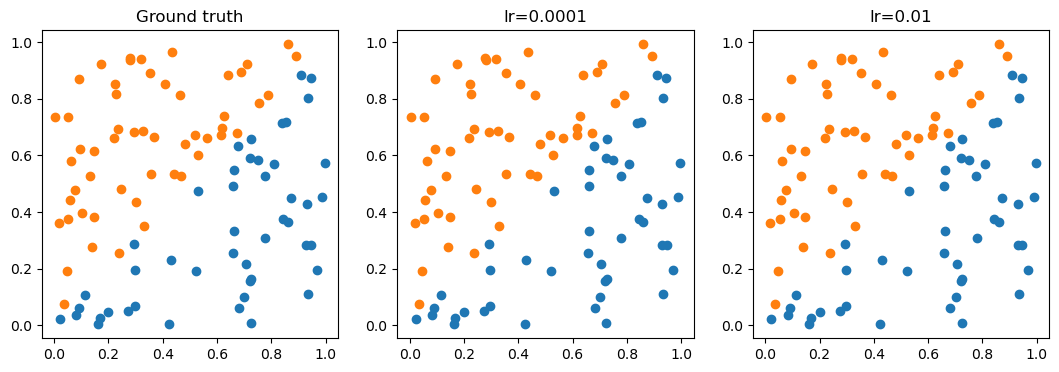

In [72]:
x, y = gernerate_linear(100)

model_lr001 = Model()
model_lr001.learning_rate = 0.01

epochs = 5001
# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model_lr001.forward1(x)
    loss = model_lr001.back_propagation1(x, y)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list, label="lr=0.01")
plt.ylabel('loss', fontsize = 14)
plt.xlabel('epochs', fontsize = 14)

# testing
print("########## Testing ##########")
y_pred_probability_lr001 = model_lr001.forward1(x)
print(y_pred_probability_lr001)
y_pred_lr001 = np.where(y_pred_probability_lr001 > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y, y_pred_lr001) if i == j) / len(y))

###############################################
  
model = Model()
model.learning_rate = 0.0001
# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model.forward1(x)
    loss = model.back_propagation1(x, y)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list, label="lr=0.0001")
plt.legend()
plt.show()

# testing
print("########## Testing ##########")
y_pred_probability = model_lr001.forward1(x)
print(y_pred_probability)
y_pred = np.where(y_pred_probability > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y, y_pred) if i == j) / len(y))

figure, axis = plt.subplots(1, 3, figsize=(13, 4))
axis[0].set_title("Ground truth")
for i in [0, 1]:
    axis[0].scatter(x=x[np.where(y[:, 0] == i), 0], y=x[np.where(y[:, 0] == i), 1])
axis[1].set_title("lr=0.0001")
for i in [0, 1]:
    axis[1].scatter(x=x[np.where(y_pred[:, 0] == i), 0], y=x[np.where(y_pred[:, 0] == i), 1])
#
axis[2].set_title("lr=0.01")
for i in [0, 1]:
    axis[2].scatter(x=x[np.where(y_pred_lr001[:, 0] == i), 0], y=x[np.where(y_pred[:, 0] == i), 1])
plt.show()


plt.show()


########## Training ##########
epoch: 0 loss: 4.066264092226719
epoch: 5000 loss: 0.08675149747672051
epoch: 10000 loss: 0.013368303159800756
epoch: 15000 loss: 0.005300830740360957
epoch: 20000 loss: 0.0030329773199852363
epoch: 25000 loss: 0.0020509812368876817
epoch: 30000 loss: 0.0015218552952234385
epoch: 35000 loss: 0.00119715252070741
epoch: 40000 loss: 0.000980049716968337
epoch: 45000 loss: 0.0008258132649110578
epoch: 50000 loss: 0.000711186474931747
epoch: 55000 loss: 0.0006229824578480272
epoch: 60000 loss: 0.0005532098681296553
epoch: 65000 loss: 0.0004967642658045634
epoch: 70000 loss: 0.0004502430769012536
epoch: 75000 loss: 0.00041129667849281864
epoch: 80000 loss: 0.0003782536628172751
epoch: 85000 loss: 0.0003498945889981899
epoch: 90000 loss: 0.000325310121837222
epoch: 95000 loss: 0.0003038091416745667
epoch: 100000 loss: 0.00028485751495376725
########## Testing ##########
[[0.00510088]
 [0.99471144]
 [0.00510114]
 [0.99471177]
 [0.00510169]
 [0.99471037]
 [0.00510

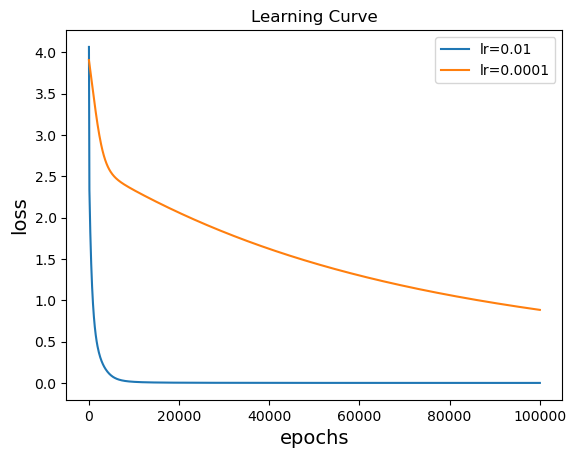

########## Testing ##########
[[0.00510088]
 [0.99471144]
 [0.00510114]
 [0.99471177]
 [0.00510169]
 [0.99471037]
 [0.0051026 ]
 [0.99470718]
 [0.0051039 ]
 [0.99470213]
 [0.00510563]
 [0.00510783]
 [0.99468592]
 [0.00511052]
 [0.99467442]
 [0.00511372]
 [0.99466035]
 [0.00511743]
 [0.99464344]
 [0.00512163]
 [0.99462337]]
accuracy:  1.0


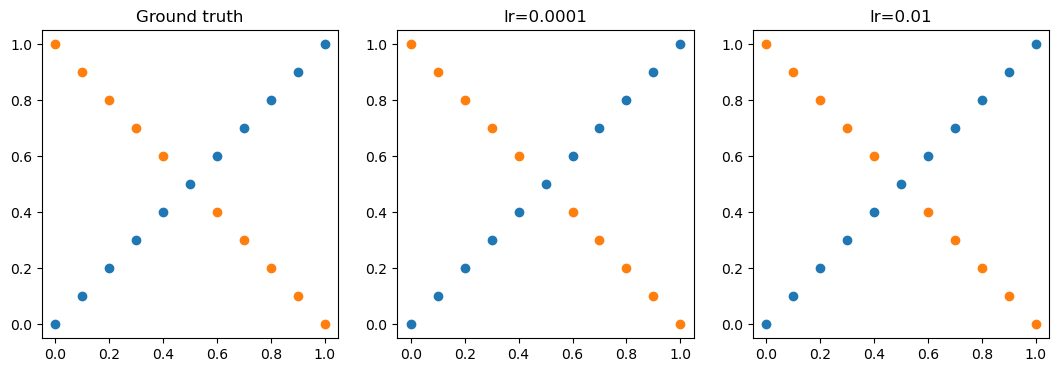

In [74]:
x_xor, y_xor = generate_XOR_easy()

model_lr001 = Model()
model_lr001.learning_rate = 0.01

epochs = 100001
# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model_lr001.forward1(x_xor)
    loss = model_lr001.back_propagation1(x_xor, y_xor)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list, label="lr=0.01")
plt.ylabel('loss', fontsize = 14)
plt.xlabel('epochs', fontsize = 14)

# testing
print("########## Testing ##########")
y_pred_probability_xor_lr001 = model_lr001.forward1(x_xor)
print(y_pred_probability_xor_lr001)
y_pred_xor_lr001 = np.where(y_pred_probability_xor_lr001 > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y_xor, y_pred_xor_lr001) if i == j) / len(y_xor))

###############################################
  
model = Model()
model.learning_rate = 0.0001
# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model.forward1(x_xor)
    loss = model.back_propagation1(x_xor, y_xor)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list, label="lr=0.0001")
plt.legend()
plt.show()

# testing
print("########## Testing ##########")
y_pred_probability_xor = model_lr001.forward1(x_xor)
print(y_pred_probability_xor)
y_pred_xor = np.where(y_pred_probability_xor > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y_xor, y_pred_xor) if i == j) / len(y_xor))

figure, axis = plt.subplots(1, 3, figsize=(13, 4))
axis[0].set_title("Ground truth")
for i in [0, 1]:
    axis[0].scatter(x=x_xor[np.where(y_xor[:, 0] == i), 0], y=x_xor[np.where(y_xor[:, 0] == i), 1])
axis[1].set_title("lr=0.0001")
for i in [0, 1]:
    axis[1].scatter(x=x_xor[np.where(y_pred_xor[:, 0] == i), 0], y=x_xor[np.where(y_pred_xor[:, 0] == i), 1])
#
axis[2].set_title("lr=0.01")
for i in [0, 1]:
    axis[2].scatter(x=x_xor[np.where(y_pred_xor_lr001[:, 0] == i), 0], y=x_xor[np.where(y_pred_xor[:, 0] == i), 1])
plt.show()


plt.show()


### different hiddem units


In [75]:
class Model_diff_hidden_units:
    def __init__(self):
        self.input_size = 2
        self.hidden1_size = 5
        self.hidden2_size = 5
        self.hidden3_size = 5
        self.hidden4_size = 5
        
        self.output_size = 1
        
        self.weights1 = np.random.rand(self.input_size, self.hidden1_size)
        self.weights2 = np.random.rand(self.hidden1_size, self.hidden2_size)
        self.weights3 = np.random.rand(self.hidden2_size, self.hidden3_size)
        self.weights4 = np.random.rand(self.hidden3_size, self.hidden4_size)
        self.weights5 = np.random.rand(self.hidden4_size, self.output_size)
        
        
        
        self.bias1 = 0.001
        self.bias2 = 0.001
        self.bias3 = 0.001
        self.bias4 = 0.001
        self.bias5 = 0.001
    
        
        self.hidden1_output = ()
        self.hidden2_output = ()
        self.hidden3_output = ()
        self.hidden4_output = ()
        self.y = ()
        
        self.learning_rate = 0.0001
        
        # more hidden units
        
        
        
        # 照理來說要用for loop把x一個個送進來，但可以直接用矩陣乘法加速

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def sigmoid_derivatives(self, x):
        return x * (1-x)

    def forward1(self, x):
        self.hidden1_output = self.sigmoid(np.dot(x, self.weights1) + self.bias1)
        # print(self.hidden1_output.shape)
        self.hidden2_output = self.sigmoid(np.dot(self.hidden1_output, self.weights2) + self.bias2)
        # print(self.hidden2_output.shape)
        self.hidden3_output = self.sigmoid(np.dot(self.hidden2_output, self.weights3) + self.bias3)
        self.hidden4_output = self.sigmoid(np.dot(self.hidden3_output, self.weights4) + self.bias4)
        self.y = self.sigmoid(np.dot(self.hidden4_output, self.weights5) + self.bias5)
        # print(self.y.shape)
        return self.y
    
    def back_propagation1(self, x, y_gt):
        ##### back propagation
        y_error = (self.y - y_gt)
        
        tmp = y_error * self.sigmoid_derivatives(self.y)
        self.weights5 -= self.learning_rate * np.dot(self.hidden4_output.T, tmp) 
        self.bias5 -= self.learning_rate * 1 * tmp
        
        hidden4_error = np.dot(tmp, self.weights5.T)
        tmp = hidden4_error * self.sigmoid_derivatives(self.hidden4_output)
        self.weights4 -= self.learning_rate * np.dot(self.hidden3_output.T, hidden4_error)
        self.bias4 -= self.learning_rate * 1 * tmp
        
        hidden3_error = np.dot(tmp, self.weights4.T)
        tmp = hidden3_error * self.sigmoid_derivatives(self.hidden3_output)
        self.weights3 -= self.learning_rate * np.dot(self.hidden2_output.T, hidden3_error)
        self.bias3 -= self.learning_rate * 1 * tmp
        
        hidden2_error = np.dot(tmp, self.weights3.T)
        tmp = hidden2_error * self.sigmoid_derivatives(self.hidden2_output)
        self.weights2 -= self.learning_rate * np.dot(self.hidden1_output.T, hidden2_error)
        self.bias2 -= self.learning_rate * 1 * tmp
        
        hidden1_error = np.dot(hidden2_error, self.weights2.T)
        tmp = hidden1_error * self.sigmoid_derivatives(self.hidden1_output)
        self.weights1 -= self.learning_rate * np.dot(x.T, tmp)
        self.bias1 -= self.learning_rate * 1 * tmp
        
        return (1/2) * np.sum((self.y - y_gt)**2) 


########## Training ##########
epoch: 0 loss: 20.353881543741892
epoch: 5000 loss: 11.779633363492199
epoch: 10000 loss: 11.06193004767409
epoch: 15000 loss: 10.390742029763869
epoch: 20000 loss: 9.764407265984781
epoch: 25000 loss: 9.18085252198113
epoch: 30000 loss: 8.637728153840413
epoch: 35000 loss: 8.132524564919029
epoch: 40000 loss: 7.662669294612053
epoch: 45000 loss: 7.2256056486242946
epoch: 50000 loss: 6.818854392156333
epoch: 55000 loss: 6.440060168315682
epoch: 60000 loss: 6.0870240819838095
epoch: 65000 loss: 5.757723524453804
epoch: 70000 loss: 5.450320060614199
epoch: 75000 loss: 5.163156260764256
epoch: 80000 loss: 4.894742795742685
epoch: 85000 loss: 4.6437378011383
epoch: 90000 loss: 4.408921178190564
epoch: 95000 loss: 4.189166836140881
epoch: 100000 loss: 3.9834157205319713
########## Training ##########
epoch: 0 loss: 20.91181842318869
epoch: 5000 loss: 11.812700806533973
epoch: 10000 loss: 11.092242568121906
epoch: 15000 loss: 10.416595334508344
epoch: 20000 los

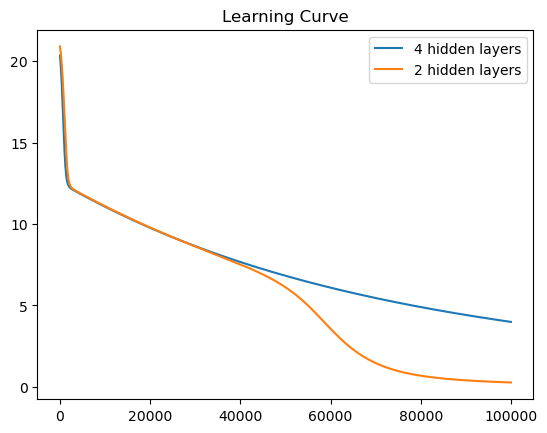

########## Testing ##########
[[0.29418576]
 [0.29431378]
 [0.72891209]
 [0.72900969]
 [0.72845645]
 [0.72887972]
 [0.29406769]
 [0.29412686]
 [0.72901992]
 [0.72881489]
 [0.29404845]
 [0.72857628]
 [0.72876206]
 [0.29399345]
 [0.72866417]
 [0.29447279]
 [0.29451275]
 [0.7287964 ]
 [0.29399827]
 [0.7291172 ]
 [0.29426417]
 [0.72872541]
 [0.29428469]
 [0.29440259]
 [0.72855039]
 [0.72876195]
 [0.2940051 ]
 [0.72871045]
 [0.29438886]
 [0.72891246]
 [0.29404764]
 [0.72866067]
 [0.72857006]
 [0.29411666]
 [0.2942315 ]
 [0.72898822]
 [0.72884023]
 [0.72895813]
 [0.7288937 ]
 [0.72879442]
 [0.72866146]
 [0.29418973]
 [0.72855326]
 [0.29421577]
 [0.72866668]
 [0.72877853]
 [0.29414896]
 [0.29412194]
 [0.29412668]
 [0.72904023]
 [0.72882734]
 [0.72869515]
 [0.29444272]
 [0.29421749]
 [0.2940699 ]
 [0.72886431]
 [0.72866302]
 [0.29428209]
 [0.72889516]
 [0.2941608 ]
 [0.7284632 ]
 [0.72897938]
 [0.72885887]
 [0.72870454]
 [0.72863833]
 [0.7291837 ]
 [0.29407273]
 [0.29408029]
 [0.29405712]
 [0.

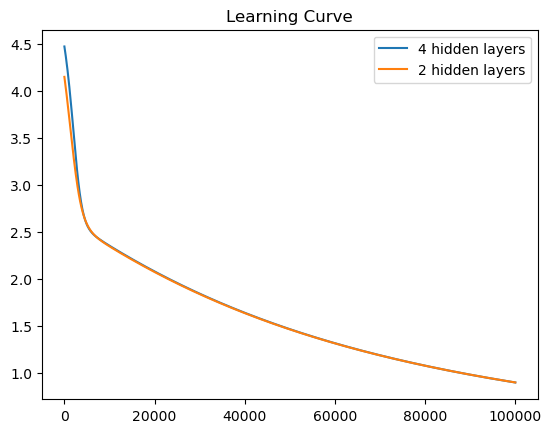

########## Testing ##########
[[0.283773  ]
 [0.69929986]
 [0.28378341]
 [0.69930025]
 [0.28379347]
 [0.69930064]
 [0.28380309]
 [0.69930104]
 [0.28381222]
 [0.69930145]
 [0.28382083]
 [0.28382887]
 [0.69930228]
 [0.28383635]
 [0.69930271]
 [0.28384327]
 [0.69930314]
 [0.28384964]
 [0.69930359]
 [0.28385549]
 [0.69930404]]
accuracy:  1.0
########## Testing ##########
[[0.28393946]
 [0.69954912]
 [0.28395015]
 [0.6995386 ]
 [0.28397271]
 [0.69952857]
 [0.28400469]
 [0.69951916]
 [0.28404356]
 [0.6995105 ]
 [0.28408693]
 [0.2841326 ]
 [0.69949587]
 [0.28417875]
 [0.69949011]
 [0.28422391]
 [0.69948551]
 [0.28426696]
 [0.69948215]
 [0.28430715]
 [0.69948009]]
accuracy:  1.0


In [81]:
model_diff_hidden_units = Model_diff_hidden_units()
model_diff_hidden_units.learning_rate = 0.0001
model = Model()
model.learning_rate = 0.0001

######### linear ########
# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model_diff_hidden_units.forward1(x)
    loss = model_diff_hidden_units.back_propagation1(x, y)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list, label="4 hidden layers")

print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model.forward1(x)
    loss = model.back_propagation1(x, y)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list, label="2 hidden layers")
plt.legend()
plt.show()

# testing
print("########## Testing ##########")
y_pred_probability = model_diff_hidden_units.forward1(x)
print(y_pred_probability)
y_pred = np.where(y_pred_probability > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y, y_pred) if i == j) / len(y))

# testing
print("########## Testing ##########")
y_pred_probability = model.forward1(x)
print(y_pred_probability)
y_pred = np.where(y_pred_probability > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y, y_pred) if i == j) / len(y))


######### XOR ########
model_diff_hidden_units = Model_diff_hidden_units()
model_diff_hidden_units.learning_rate = 0.0001
model = Model()
model.learning_rate = 0.0001

# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model_diff_hidden_units.forward1(x_xor)
    loss = model_diff_hidden_units.back_propagation1(x_xor, y_xor)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list, label="4 hidden layers")

# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model.forward1(x_xor)
    loss = model.back_propagation1(x_xor, y_xor)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list, label="2 hidden layers")

plt.legend()
plt.show()

# testing
print("########## Testing ##########")
y_pred_probability_xor = model_diff_hidden_units.forward1(x_xor)
print(y_pred_probability_xor)
y_pred_xor = np.where(y_pred_probability_xor > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y_xor, y_pred_xor) if i == j) / len(y_xor))

# testing
print("########## Testing ##########")
y_pred_probability_xor = model.forward1(x_xor)
print(y_pred_probability_xor)
y_pred_xor = np.where(y_pred_probability_xor > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y_xor, y_pred_xor) if i == j) / len(y_xor))

## Without activation

########## Training ##########
epoch: 0 loss: 258.8161011318524
epoch: 5000 loss: 0.04834864649287324
epoch: 10000 loss: 5.752198750225207e-05
epoch: 15000 loss: 5.487481916597947e-08
epoch: 20000 loss: 5.2531429503115227e-11
epoch: 25000 loss: 5.3862587066229175e-14
epoch: 30000 loss: 7.732381560914782e-17
epoch: 35000 loss: 2.3809156565932927e-19
epoch: 40000 loss: 1.255322589963075e-21
epoch: 45000 loss: 7.659630770380925e-24
epoch: 50000 loss: 8.355029869084611e-26
epoch: 55000 loss: 3.774726187239187e-26
epoch: 60000 loss: 3.3723281253403043e-26
epoch: 65000 loss: 3.154005445771924e-26
epoch: 70000 loss: 3.046658358236128e-26
epoch: 75000 loss: 2.996983801759543e-26
epoch: 80000 loss: 2.944254918017622e-26
epoch: 85000 loss: 2.915089875075782e-26
epoch: 90000 loss: 2.902010417552689e-26
epoch: 95000 loss: 2.892381817591877e-26
########## Training ##########
epoch: 0 loss: 20.42247497704372
epoch: 5000 loss: 11.813383175081958
epoch: 10000 loss: 11.088127633634722
epoch: 15000 loss

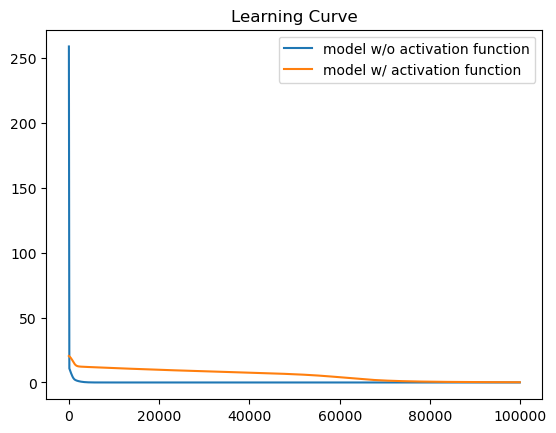

########## Testing ##########
[[ 1.00000000e+00]
 [ 2.31759056e-14]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [-2.70061751e-14]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.15532584e-14]
 [ 4.34895175e-15]
 [ 1.00000000e+00]
 [ 8.45157277e-15]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 5.32213162e-15]
 [-1.14769305e-14]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 5.74887360e-15]
 [-2.64233080e-14]
 [-2.38004061e-15]
 [ 1.00000000e+00]
 [ 1.14977472e-14]
 [ 1.00000000e+00]
 [ 4.14251966e-15]
 [ 1.00000000e+00]
 [ 1.11716192e-14]
 [ 1.00000000e+00]
 [ 3.89271948e-15]
 [ 3.49026363e-15]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 2.78596590e-15]
 [ 1.00000000e+00]
 [ 4.61852778e-14]
 [ 1.83811300e-14]
 [ 1.16573418e-14]
 [ 1.15255028e-14]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [-7.51620988e-14]
 [ 3.45047341e-16]
 [ 1.00000000e+00]
 

In [112]:
x, y = gernerate_linear()
epochs = 100000

model_wo_activation = Model()
model = Model()
######### linear ########
# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model_wo_activation.forward_wo_activation(x)
    loss = model_wo_activation.back_propagation_wo_activation(x, y)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list, label="model w/o activation function")

print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model.forward1(x)
    loss = model.back_propagation1(x, y)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list, label="model w/ activation function")
plt.legend()
plt.show()

# testing
print("########## Testing ##########")
y_pred_probability = model_wo_activation.forward_wo_activation(x)
print(y_pred_probability)
y_pred = np.where(y_pred_probability > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y, y_pred) if i == j) / len(y))

# testing
print("########## Testing ##########")
y_pred_probability = model.forward1(x)
print(y_pred_probability)
y_pred = np.where(y_pred_probability > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y, y_pred) if i == j) / len(y))

########## Training ##########
epoch: 0 loss: 45.946492545803125
epoch: 5000 loss: 0.027044148243497296
epoch: 10000 loss: 6.9075210209419014e-06
epoch: 15000 loss: 1.4295525892734859e-09
epoch: 20000 loss: 7.726281578957528e-13
epoch: 25000 loss: 3.1623043011979063e-15
epoch: 30000 loss: 1.8953817001646012e-17
epoch: 35000 loss: 1.15341014348857e-19
epoch: 40000 loss: 7.0226099288703e-22
epoch: 45000 loss: 4.282024187501399e-24
epoch: 50000 loss: 4.466636198814672e-26
epoch: 55000 loss: 2.0199380076351397e-26
epoch: 60000 loss: 2.01144878277583e-26
epoch: 65000 loss: 2.008657023431536e-26
epoch: 70000 loss: 2.0086564051320869e-26
epoch: 75000 loss: 2.0086564051320869e-26
epoch: 80000 loss: 2.0086564051320869e-26
epoch: 85000 loss: 2.0086564051320869e-26
epoch: 90000 loss: 2.0086564051320869e-26
epoch: 95000 loss: 2.0086564051320869e-26
########## Training ##########
epoch: 0 loss: 4.344110576861697
epoch: 5000 loss: 2.666384513869922
epoch: 10000 loss: 2.353985900197883
epoch: 15000 l

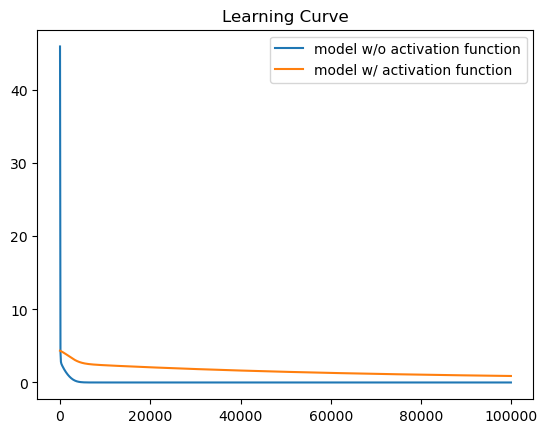

########## Testing ##########
[[ 6.40221383e-17]
 [ 1.00000000e+00]
 [ 9.50975410e-15]
 [ 1.00000000e+00]
 [ 2.70061751e-14]
 [ 1.00000000e+00]
 [ 3.28487237e-14]
 [ 1.00000000e+00]
 [ 5.40123501e-14]
 [ 1.00000000e+00]
 [ 5.40262279e-14]
 [ 6.56974475e-14]
 [ 1.00000000e+00]
 [ 7.61612995e-14]
 [ 1.00000000e+00]
 [-8.00470801e-14]
 [ 1.00000000e+00]
 [-8.32112157e-14]
 [ 1.00000000e+00]
 [-9.25926003e-14]
 [ 1.00000000e+00]]
accuracy:  1.0
########## Testing ##########
[[0.28353142]
 [0.70110505]
 [0.28331262]
 [0.70108731]
 [0.28313028]
 [0.70107052]
 [0.28298261]
 [0.70105475]
 [0.28286685]
 [0.70104008]
 [0.28277955]
 [0.28271691]
 [0.70101434]
 [0.28267506]
 [0.7010034 ]
 [0.28265023]
 [0.70099383]
 [0.28263897]
 [0.70098567]
 [0.28263819]
 [0.70097898]]
accuracy:  1.0


In [117]:

x_xor, y_xor = generate_XOR_easy()
epochs = 100000
######### XOR ########
model_wo_activation = Model()
model = Model()


# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model_wo_activation.forward_wo_activation(x_xor)
    loss = model_wo_activation.back_propagation_wo_activation(x_xor, y_xor)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list, label="model w/o activation function")

# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model.forward1(x_xor)
    loss = model.back_propagation1(x_xor, y_xor)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list, label="model w/ activation function")

plt.legend()
plt.show()

# testing
print("########## Testing ##########")
y_pred_probability_xor = model_wo_activation.forward_wo_activation(x_xor)
print(y_pred_probability_xor)
y_pred_xor = np.where(y_pred_probability_xor > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y_xor, y_pred_xor) if i == j) / len(y_xor))

# testing
print("########## Testing ##########")
y_pred_probability_xor = model.forward1(x_xor)
print(y_pred_probability_xor)
y_pred_xor = np.where(y_pred_probability_xor > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y_xor, y_pred_xor) if i == j) / len(y_xor))


## Extra
#### Momentum

########## Training ##########
epoch: 0 loss: 20.98366639051865
epoch: 5000 loss: 0.12377883282730136
epoch: 10000 loss: 0.03882040792974862
epoch: 15000 loss: 0.02279506723439072
epoch: 20000 loss: 0.016059716243549696
epoch: 25000 loss: 0.012354797262595854
epoch: 30000 loss: 0.010013286154186446
epoch: 35000 loss: 0.008400739737487763
epoch: 40000 loss: 0.007224936100507047
epoch: 45000 loss: 0.006331126134309971
epoch: 50000 loss: 0.005629580770399808
epoch: 55000 loss: 0.005065082822388379
epoch: 60000 loss: 0.00460172660018974
epoch: 65000 loss: 0.004214557977970245
epoch: 70000 loss: 0.0038865830529126438
epoch: 75000 loss: 0.003605445453494254
epoch: 80000 loss: 0.0033620506892549037
epoch: 85000 loss: 0.0031493811661491384
epoch: 90000 loss: 0.0029620575018952998
epoch: 95000 loss: 0.0027958710491676427
epoch: 100000 loss: 0.002647483924550626
########## Testing ##########
[[0.99254387]
 [0.00631056]
 [0.00691451]
 [0.00631846]
 [0.00714049]
 [0.99309346]
 [0.99296087]
 [0.992

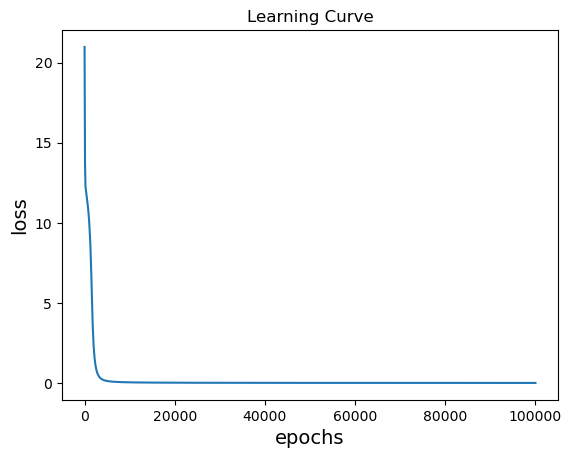

In [120]:
x, y = gernerate_linear(n=100)

epochs = 100001   
model = Model()
# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model.forward2(x)
    loss = model.back_propagation_momentum(x, y)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list)
plt.ylabel('loss', fontsize = 14)
plt.xlabel('epochs', fontsize = 14)

# testing
print("########## Testing ##########")
y_pred_probability = model.forward2(x)
print(y_pred_probability)
y_pred = np.where(y_pred_probability > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y, y_pred) if i == j) / len(y))

########## Training ##########
epoch: 0 loss: 3.839906735074614
epoch: 5000 loss: 1.450522310414499
epoch: 10000 loss: 0.8711002129462818
epoch: 15000 loss: 0.5573556259148867
epoch: 20000 loss: 0.34074979918997295
epoch: 25000 loss: 0.18471631160201102
epoch: 30000 loss: 0.10526220420541195
epoch: 35000 loss: 0.0687225491234428
epoch: 40000 loss: 0.049484531058247266
epoch: 45000 loss: 0.03794948711631372
epoch: 50000 loss: 0.030357209102679895
epoch: 55000 loss: 0.025008036185692473
epoch: 60000 loss: 0.02104946370215394
epoch: 65000 loss: 0.018011400205942545
epoch: 70000 loss: 0.015626442706736084
epoch: 75000 loss: 0.013711043357229627
epoch: 80000 loss: 0.01214520971702158
epoch: 85000 loss: 0.010849150054851894
epoch: 90000 loss: 0.009761831686377957
epoch: 95000 loss: 0.008841418855184247
epoch: 100000 loss: 0.00805500956767887
########## Testing ##########
[[0.06467708]
 [0.9720414 ]
 [0.02210798]
 [0.97205297]
 [0.02137629]
 [0.97208651]
 [0.02095129]
 [0.97214052]
 [0.020666

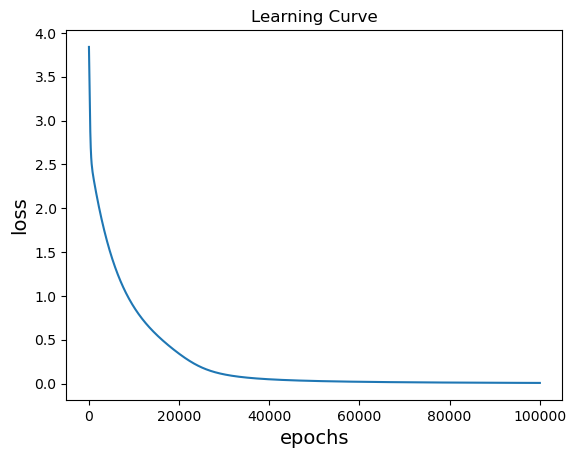

In [121]:
x_xor, y_xor = generate_XOR_easy()

epochs = 100001   
model = Model()
# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model.forward2(x_xor)
    loss = model.back_propagation_momentum(x_xor, y_xor)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list)
plt.ylabel('loss', fontsize = 14)
plt.xlabel('epochs', fontsize = 14)

# testing
print("########## Testing ##########")
y_pred_probability_xor = model.forward2(x_xor)
print(y_pred_probability_xor)
y_pred_xor = np.where(y_pred_probability_xor > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y_xor, y_pred_xor) if i == j) / len(y_xor))

#### ReLU

########## Training ##########
epoch: 0 loss: 20.73536564763173
epoch: 5000 loss: 11.789775927075052
epoch: 10000 loss: 10.835956970847555
epoch: 15000 loss: 8.61529402767449
epoch: 20000 loss: 2.202889096626899
epoch: 25000 loss: 0.5932313150067356
epoch: 30000 loss: 0.28984814836234324
epoch: 35000 loss: 0.18148273449785834
epoch: 40000 loss: 0.1305200064567744
epoch: 45000 loss: 0.10199369277091143
epoch: 50000 loss: 0.08399043322716825
epoch: 55000 loss: 0.07161203429671811
epoch: 60000 loss: 0.0625394055488533
epoch: 65000 loss: 0.05556806923984313
epoch: 70000 loss: 0.05002296385207603
epoch: 75000 loss: 0.04549373520318676
epoch: 80000 loss: 0.04171706336793125
epoch: 85000 loss: 0.038515706681560076
epoch: 90000 loss: 0.03576546858941753
epoch: 95000 loss: 0.03337621686248903
epoch: 100000 loss: 0.03128082924299274
########## Testing ##########
[[0.01741083]
 [0.01748232]
 [0.01784334]
 [0.01754506]
 [0.97483655]
 [0.97428192]
 [0.9745136 ]
 [0.01992762]
 [0.97425671]
 [0.02017

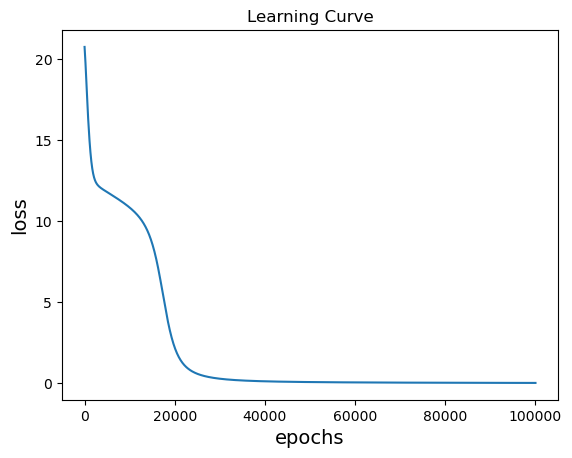

In [118]:
x, y = gernerate_linear(n=100)

epochs = 100001   
model = Model()
# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model.forward2(x)
    loss = model.back_propagation2(x, y)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list)
plt.ylabel('loss', fontsize = 14)
plt.xlabel('epochs', fontsize = 14)

# testing
print("########## Testing ##########")
y_pred_probability = model.forward2(x)
print(y_pred_probability)
y_pred = np.where(y_pred_probability > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y, y_pred) if i == j) / len(y))

########## Training ##########
epoch: 0 loss: 3.9952790928177624
epoch: 5000 loss: 2.624080742981194
epoch: 10000 loss: 2.3539236584972763
epoch: 15000 loss: 2.2010597716962
epoch: 20000 loss: 2.0615493729436856
epoch: 25000 loss: 1.9309245142502973
epoch: 30000 loss: 1.8079440548669052
epoch: 35000 loss: 1.6910501858970413
epoch: 40000 loss: 1.5785852391237583
epoch: 45000 loss: 1.4682494838431153
epoch: 50000 loss: 1.357219704228132
epoch: 55000 loss: 1.2418711251944266
epoch: 60000 loss: 1.1186535381658644
epoch: 65000 loss: 0.9832971039172883
epoch: 70000 loss: 0.8345860785897498
epoch: 75000 loss: 0.6797947138855608
epoch: 80000 loss: 0.5374067029216381
epoch: 85000 loss: 0.42181340802561346
epoch: 90000 loss: 0.33388564069291715
epoch: 95000 loss: 0.2692990446309815
epoch: 100000 loss: 0.22225805709599591
########## Testing ##########
[[0.29746734]
 [0.85481204]
 [0.12350854]
 [0.85457329]
 [0.11818546]
 [0.85433493]
 [0.11741821]
 [0.85409821]
 [0.11722492]
 [0.85386056]
 [0.117

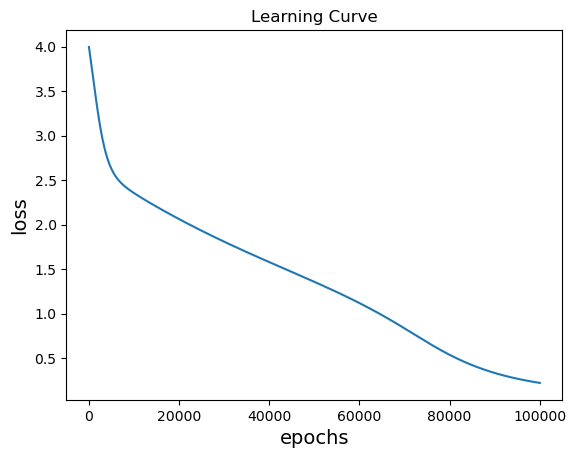

In [122]:
x_xor, y_xor = generate_XOR_easy()

epochs = 100001   
model = Model()
# training
print("########## Training ##########")
loss_list = []
epoch_list = []

plt.title("Learning Curve")
for epoch in range(epochs):
    y_test = model.forward2(x_xor)
    loss = model.back_propagation2(x_xor, y_xor)
    if(epoch % 5000 == 0):
        print(f"epoch: {epoch} loss: {loss}")
    if(epoch % 100 == 0):
        loss_list.append(loss)
        epoch_list.append(epoch)
plt.plot(epoch_list, loss_list)
plt.ylabel('loss', fontsize = 14)
plt.xlabel('epochs', fontsize = 14)

# testing
print("########## Testing ##########")
y_pred_probability_xor = model.forward2(x_xor)
print(y_pred_probability_xor)
y_pred_xor = np.where(y_pred_probability_xor > 0.5, 1, 0)
print("accuracy: ", sum(1 for i, j in zip(y_xor, y_pred_xor) if i == j) / len(y_xor))